In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [2]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSoWlC95jITQPtUIxqy4qDXN4hhXfqSuAbRDAGC2gd91kBHg3CFXy0Wzp9ZYpXa9AGwzGj9YYYaSijO/pub?gid=1841761783&single=true&output=csv')
df.head()

,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
0,AL,34.34960,-86.72508,Suburban,1.0,53,86575.93,Divorced,Male,0,...,0.0,1.0,1.0,1.0,0,1,Blood Work,10.585770,3726.702860,17939.403420
1,FL,30.84513,-85.22907,Urban,3.0,51,46805.99,Married,Female,0,...,0.0,0.0,0.0,0.0,1,0,Intravenous,15.129562,4193.190458,17612.998120
2,SD,43.54321,-96.63772,Suburban,3.0,53,14370.14,Widowed,Female,0,...,0.0,0.0,0.0,0.0,0,0,Blood Work,4.772177,2434.234222,17505.192460
3,MN,43.89744,-93.51479,Suburban,0.0,78,39741.49,Married,Male,0,...,0.0,0.0,0.0,0.0,1,1,Blood Work,1.714879,2127.830423,12993.437350
4,VA,37.59894,-76.88958,Rural,1.0,22,1209.56,Widowed,Female,0,...,1.0,0.0,0.0,1.0,0,0,CT Scan,1.254807,2113.073274,3716.525786


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               995 non-null    object 
 1   Lat                 1000 non-null   float64
 2   Lng                 1000 non-null   float64
 3   Area                995 non-null    object 
 4   Children            993 non-null    float64
 5   Age                 1000 non-null   int64  
 6   Income              1000 non-null   float64
 7   Marital             995 non-null    object 
 8   Gender              995 non-null    object 
 9   ReAdmis             1000 non-null   int64  
 10  VitD_levels         1000 non-null   float64
 11  Doc_visits          1000 non-null   int64  
 12  Full_meals_eaten    1000 non-null   int64  
 13  vitD_supp           1000 non-null   int64  
 14  Soft_drink          1000 non-null   int64  
 15  Initial_admin       995 non-null    object 
 16  HighBlo

# VitD_levels

In [5]:
vitD_levels = df['VitD_levels'].copy()
vitD_levels

0      19.141466
1      18.940352
2      18.057507
3      16.576858
4      17.439069
         ...    
995    16.631573
996    17.810233
997    17.011913
998    16.526670
999    19.487658
Name: VitD_levels, Length: 1000, dtype: float64

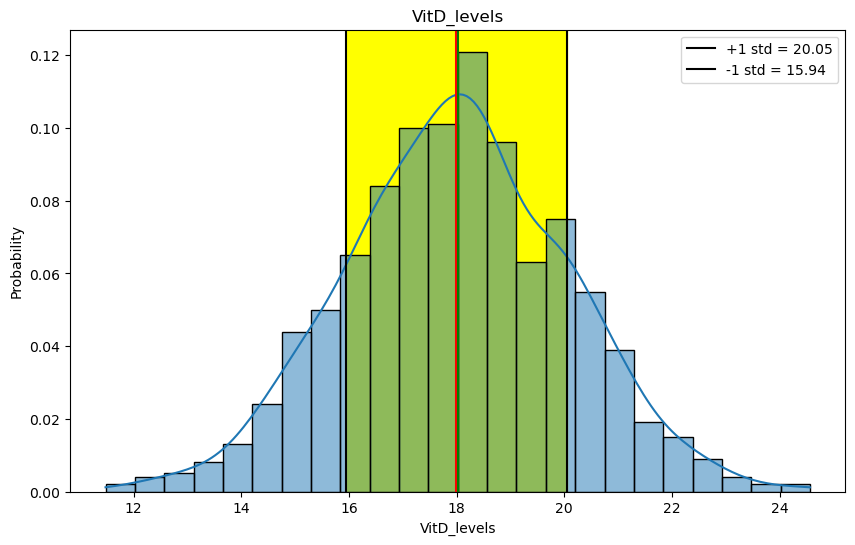

In [8]:
mean = vitD_levels.mean()
median = vitD_levels.median()
std = vitD_levels.std()
plus_one_std = mean + std
minus_one_std = mean - std
fig, ax = plt.subplots(figsize = (10,6))

ax = sns.histplot(x=vitD_levels, stat='probability', kde=True)
ax.axvline(mean, color ='red')
ax.axvline(median, color ='green')
ax.axvline(plus_one_std, color = 'black', label=f'+1 std = {plus_one_std:,.2f}')
ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
ax.axvspan(plus_one_std, minus_one_std, color = 'yellow', zorder = 0)
ax.set_title("VitD_levels")
ax.legend();

In [14]:
kurt = stats.kurtosis(vitD_levels, fisher = False)
kurt

3.013147515833447

* Is it Discrete or Continuous? : Continuous
* Does it have a skew? If so, which direction (+/-) : Normal skew.
* What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic) : Mesokurtic

# Doc_visits

In [9]:
doc_visits = df['Doc_visits'].copy()
doc_visits

0      6
1      4
2      4
3      4
4      5
      ..
995    7
996    6
997    5
998    4
999    7
Name: Doc_visits, Length: 1000, dtype: int64

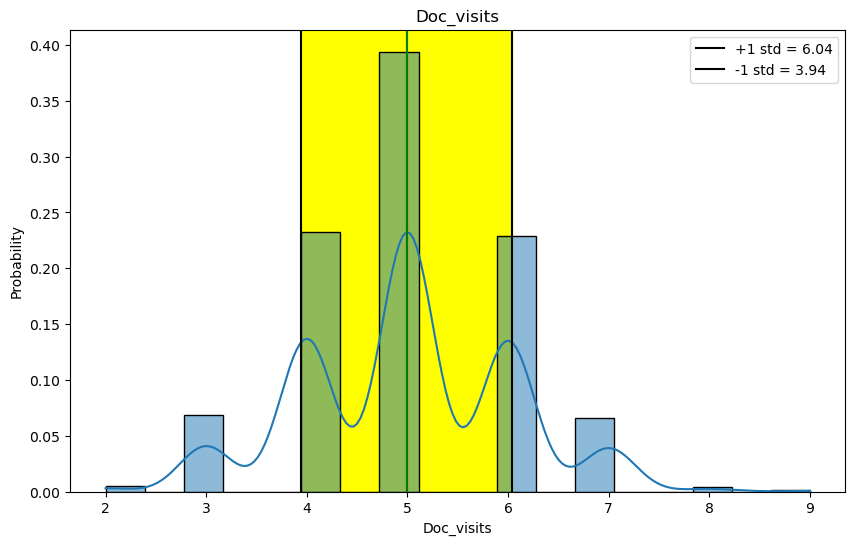

In [10]:
mean = doc_visits.mean()
median = doc_visits.median()
std = doc_visits.std()
plus_one_std = mean + std
minus_one_std = mean - std
fig, ax = plt.subplots(figsize = (10,6))

ax = sns.histplot(x=doc_visits, stat='probability', kde=True)
ax.axvline(mean, color ='red')
ax.axvline(median, color ='green')
ax.axvline(plus_one_std, color = 'black', label=f'+1 std = {plus_one_std:,.2f}')
ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
ax.axvspan(plus_one_std, minus_one_std, color = 'yellow', zorder = 0)
ax.set_title("Doc_visits")
ax.legend();

In [16]:
kurt = stats.kurtosis(doc_visits, fisher = False)
kurt

2.9919958083381206

* Is it Discrete or Continuous? : Discrete
* Does it have a skew? If so, which direction (+/-) : Normal skew.
* What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic) : Mesokurtic

# TotalCharge

In [11]:
total_charge = df['TotalCharge'].copy()
total_charge

0      3726.702860
1      4193.190458
2      2434.234222
3      2127.830423
4      2113.073274
          ...     
995    2747.196682
996    3661.760740
997    5259.932456
998    3083.731857
999    2830.020820
Name: TotalCharge, Length: 1000, dtype: float64

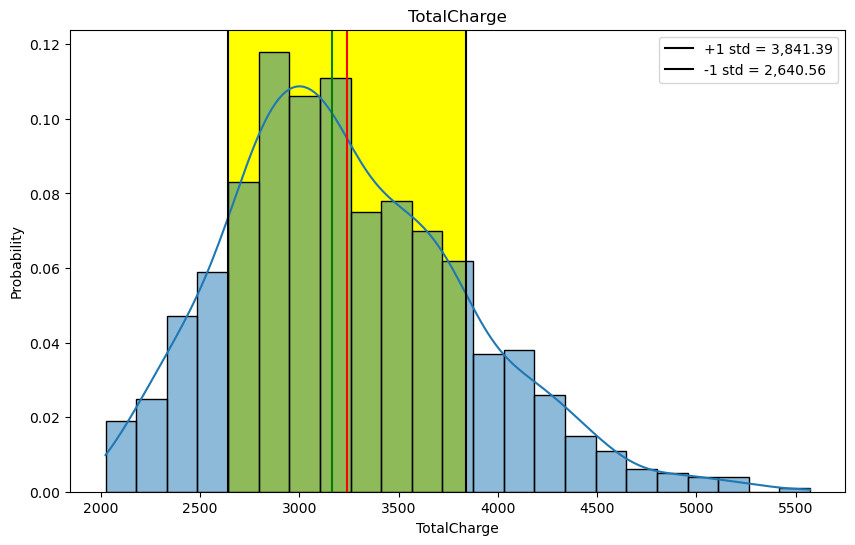

In [12]:
mean = total_charge.mean()
median = total_charge.median()
std = total_charge.std()
plus_one_std = mean + std
minus_one_std = mean - std
fig, ax = plt.subplots(figsize = (10,6))

ax = sns.histplot(x=total_charge, stat='probability', kde=True)
ax.axvline(mean, color ='red')
ax.axvline(median, color ='green')
ax.axvline(plus_one_std, color = 'black', label=f'+1 std = {plus_one_std:,.2f}')
ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
ax.axvspan(plus_one_std, minus_one_std, color = 'yellow', zorder = 0)
ax.set_title("TotalCharge")
ax.legend();

In [17]:
kurt = stats.kurtosis(total_charge, fisher = False)
kurt

3.2650077463439384

* Is it Discrete or Continuous? : Continuous
* Does it have a skew? If so, which direction (+/-) : Positively skewed. 
* What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic) : Leptokurtic